# Perform the benchmarking on the different traditions

Selected metrics:
- **RF**
- **signed_similarity**
- **graph_edit_distance**
- **adjacency_matrix**

## Load the ground truths

In [1]:
from stemmadist.utils.utils import load_tree

In [2]:
with open("results/notre_besoin/notrebesoin_gt_v1.newick", "r") as f:
    tree_gt_str_v1 = f.read()

tree_gt_v1 = load_tree(tree_gt_str_v1)

print(tree_gt_v1.ascii_art())

        ┌─T1
        │       ┌─T2
────────┤       │       ┌─A
        │       │       │       ┌─C
        └───────┤       │       │       ┌─S
                │       ├───────┼───────┤
                │       │       │       └─D
                │       │       └─M
                └───────┤       ┌─U
                        ├───────┤               ┌─omega
                        │       │       ┌───────┤
                        │       │       │       │       ┌─B
                        │       └───────┤       └───────┤
                        │               │               └─L
                        │               └─V
                        └─J


In [3]:
with open("results/notre_besoin/notrebesoin_gt_v2.newick", "r") as f:
    tree_gt_str_v2 = f.read()

stemma_ref = load_tree(tree_gt_str_v2)

print(stemma_ref.ascii_art())

                                ┌─M
                        ┌─C─────┤
                        │       └─S──── ──D
──T1─── ──T2─── ──A─────┤       ┌─V
                        ├─U─────┤
                        │       └─omega ──B──── ──L
                        └─J


## Compute distances between computed trees

In [4]:
from stemmadist.main import compute_distance

In [115]:
from pathlib import Path

distance_to_gt = {}
for file_tree in Path("results/notre_besoin/paup_trees/").glob("*.tre"):

    with open(file_tree, "r") as f:
        result_tree_str = f.read()
    method = file_tree.stem
    distance_to_gt[method] = {}
    for distance in ["signed_similarity",
                        "graph_edit_distance",
                        "rf",
                        "adjacency_matrix"]:
                        #"matching_split"]:
        distance_to_gt[method][distance] = compute_distance(tree_gt_str_v1, result_tree_str, distance_name=distance)


In [116]:
import pandas as pd

df_notre_besoin_dist = pd.DataFrame(distance_to_gt).T
df_notre_besoin_dist = df_notre_besoin_dist.assign(tradition="notre_besoin")

df_notre_besoin = pd.DataFrame(distance_to_gt).T
df_notre_besoin = pd.DataFrame(df_notre_besoin).assign(**df_notre_besoin.iloc[:, :].rank(axis = 0, ascending = True).astype(int)).iloc[:,1:]
print(pd.DataFrame(df_notre_besoin).assign(**df_notre_besoin.iloc[:, :].rank(axis = 0, ascending = True).astype(int)).iloc[:,1:].to_latex())

df_notre_besoin = df_notre_besoin.assign(tradition="notre_besoin")

\begin{tabular}{lrr}
\toprule
 & rf & adjacency_matrix \\
\midrule
bs_ls & 2 & 1 \\
bs_nj & 3 & 2 \\
bs_parsi & 1 & 6 \\
nj & 5 & 4 \\
parsi & 6 & 5 \\
ls & 3 & 2 \\
\bottomrule
\end{tabular}



In [117]:
import numpy as np
from math import comb

def max_rf_distance(num_nodes):
    """
    Calculate the maximum Robinson-Foulds distance for two non-bifurcating trees 
    with a given number of nodes.
    """
    if num_nodes < 2:
        return 0  # RF distance is 0 for trees with less than 2 nodes
    # Each tree can have up to (num_nodes - 1) splits, so the max RF distance is:
    return 2 * (num_nodes - 1)

def max_graph_edit_distance(num_nodes, directed=False):
    """
    Calculate the maximum graph edit distance for graphs with a given number of nodes.
    For undirected graphs, this is twice the number of edges plus the number of nodes.
    For directed graphs, the possible maximum edits include each directed edge and node.
    """
    if directed:
        # Directed graph max edges
        max_edges = num_nodes * (num_nodes - 1)  # n * (n - 1) possible directed edges
    else:
        # Undirected graph max edges
        max_edges = comb(num_nodes, 2)  # Combination n choose 2 for undirected edges

    # Max edits is the total possible number of edges and nodes
    max_distance = max_edges + num_nodes
    return max_distance

def max_l1_distance(num_nodes, directed=False):
    """
    Calculate the maximum L1 norm (Manhattan distance) between adjacency matrices
    of two graphs with a given number of nodes.
    
    Parameters:
    - num_nodes: int, number of nodes in the graphs
    - directed: bool, whether the graph is directed or undirected
    
    Returns:
    - max_l1_distance: int, the maximum L1 distance between two adjacency matrices
    """
    if directed:
        # Directed graph: maximum L1 distance includes all directed edges between nodes
        max_l1_distance = num_nodes * (num_nodes - 1)
    else:
        # Undirected graph: maximum L1 distance is twice the number of unique edges
        max_l1_distance = 2 * comb(num_nodes, 2)
    
    return max_l1_distance

# Example usage:
num_nodes = 12  # Example number of nodes
print("Maximum Robinson-Foulds Distance:", max_rf_distance(num_nodes))
print("Maximum Graph Edit Distance (Undirected):", max_graph_edit_distance(num_nodes))
print("Maximum Graph Edit Distance (Directed):", max_graph_edit_distance(num_nodes, directed=True))
print("Maximum Adjacency Matrix (Undirected):\n", max_l1_distance(num_nodes))
print("Maximum Adjacency Matrix (Directed):\n", max_l1_distance(num_nodes, directed=True))


Maximum Robinson-Foulds Distance: 22
Maximum Graph Edit Distance (Undirected): 78
Maximum Graph Edit Distance (Directed): 144
Maximum Adjacency Matrix (Undirected):
 132
Maximum Adjacency Matrix (Directed):
 132


In [21]:
100-df_notre_besoin/max_rf_distance(num_nodes)*100

100-df_notre_besoin*100

,bs_ls,bs_nj,bs_parsi,nj,parsi,ls
signed_similarity,65.502451,59.517544,68.73065,57.017544,56.096491,59.517544
graph_edit_distance,-650.000000,-550.000000,-650.00000,-1000.000000,-650.000000,-550.000000
rf,-900.000000,-1100.000000,-800.00000,-1200.000000,-1300.000000,-1100.000000
adjacency_matrix,68.647380,67.463849,65.49020,66.928109,66.666667,67.463849


In [22]:
100-df_notre_besoin/max_graph_edit_distance(num_nodes)*100



,bs_ls,bs_nj,bs_parsi,nj,parsi,ls
signed_similarity,99.557724,99.480994,99.599111,99.448943,99.437135,99.480994
graph_edit_distance,90.384615,91.666667,90.384615,85.897436,90.384615,91.666667
rf,87.179487,84.615385,88.461538,83.333333,82.051282,84.615385
adjacency_matrix,99.598043,99.582870,99.557567,99.576001,99.572650,99.582870


## Parzival tradition

In [118]:
with open("results/parzival/gt/parzival.newick", "r") as f:
    tree_gt_str_v2 = f.read()

stemma_ref = load_tree(tree_gt_str_v2)

print(stemma_ref.ascii_art())

                  ┌─p11
                  │     ┌─p6
            ┌─────┼─p8──┤
            │     │     └─p14
            │     │     ┌─p5
      ┌─────┤     └─────┤
      │     │           └─p10
      │     │     ┌─p14
      │     └─p8──┤
      │           └─p6
      │     ┌─p2
      │     ├─p16
──────┼─────┤
      │     ├─p15
      │     └─p12 ──p13
      │     ┌─p3
      ├─────┤
      │     └─p7
      │     ┌─p1
      └─p9──┤
            └─p4


In [119]:
from pathlib import Path

distance_to_gt = {}
for file_tree in Path("results/parzival/paup_trees/").glob("*.tre"):

    with open(file_tree, "r") as f:
        result_tree_str = f.read()
    method = file_tree.stem
    distance_to_gt[method] = {}
    for distance in ["signed_similarity",
                        "graph_edit_distance",
                        "rf",
                        "adjacency_matrix"]:
                        #"matching_split"]:
        distance_to_gt[method][distance] = compute_distance(tree_gt_str_v1, result_tree_str, distance_name=distance)


In [120]:
df_parzival_dist = pd.DataFrame(distance_to_gt).T
df_parzival_dist = df_parzival_dist.assign(tradition="parzival")


df_parzival = pd.DataFrame(distance_to_gt).T
df_parzival = pd.DataFrame(df_parzival).assign(**df_parzival.iloc[:, :].rank(axis = 0, ascending = True).astype(int)).iloc[:,1:]

print(pd.DataFrame(df_parzival).assign(**df_parzival.iloc[:, :].rank(axis = 0, ascending = True).astype(int)).iloc[:,1:].to_latex())

df_parzival = df_parzival.assign(tradition="parzival")

df = pd.concat([df_parzival, df_notre_besoin])

\begin{tabular}{lrr}
\toprule
 & rf & adjacency_matrix \\
\midrule
bs_ls & 2 & 4 \\
bs_nj & 3 & 5 \\
bs_parsi & 1 & 3 \\
nj & 6 & 1 \\
parsi & 5 & 2 \\
ls & 3 & 5 \\
\bottomrule
\end{tabular}



In [166]:
%pip install Bio

69306.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.8 MB/s eta 0:00:00a 0:00:01
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [167]:
from anytree import Node, RenderTree
from io import StringIO
from Bio import Phylo

def parse_newick(newick_str):
    """Parse a Newick formatted string into a tree of Nodes."""
    handle = StringIO(newick_str)
    tree = Phylo.read(handle, "newick")
    return tree

def graph_edit_distance(node1, node2):
    """Recursively compute the graph edit distance between two nodes."""
    if node1.name != node2.name:
        # Cost of substitution if node names differ
        cost = 1
    else:
        cost = 0

    # Get children of both nodes
    children1 = list(node1.clades)
    children2 = list(node2.clades)

    # Calculate insertion or deletion costs for unbalanced children
    ins_del_cost = abs(len(children1) - len(children2))

    # Structure comparison for all pairs of children
    sub_cost = 0
    for c1, c2 in zip(children1, children2):
        sub_cost += graph_edit_distance(c1, c2)

    # Total cost includes substitution, insertion/deletion, and structure costs
    total_cost = cost + ins_del_cost + sub_cost
    return total_cost

# Test the function with provided trees
stemma_ref = "((F,E)C,(D,H)B)A;"
stemma_1 = "((F,E)B,(D,H)C)A;"

# Parse the Newick strings into tree structures
tree1 = parse_newick(stemma_ref)
tree2 = parse_newick(stemma_1)

# Calculate the graph edit distance
distance = graph_edit_distance(tree1.root, tree2.root)
print(f"Graph edit distance: {distance}")


Graph edit distance: 2


In [121]:
print(df.reset_index().groupby(["index", "tradition"]).sum().to_latex())

\begin{tabular}{llrrr}
\toprule
 &  & graph_edit_distance & rf & adjacency_matrix \\
index & tradition &  &  &  \\
\midrule
\multirow[t]{2}{*}{bs_ls} & notre_besoin & 4 & 2 & 1 \\
 & parzival & 4 & 2 & 4 \\
\cline{1-5}
\multirow[t]{2}{*}{bs_nj} & notre_besoin & 1 & 3 & 2 \\
 & parzival & 5 & 3 & 5 \\
\cline{1-5}
\multirow[t]{2}{*}{bs_parsi} & notre_besoin & 4 & 1 & 6 \\
 & parzival & 3 & 1 & 3 \\
\cline{1-5}
\multirow[t]{2}{*}{ls} & notre_besoin & 1 & 3 & 2 \\
 & parzival & 5 & 3 & 5 \\
\cline{1-5}
\multirow[t]{2}{*}{nj} & notre_besoin & 6 & 5 & 4 \\
 & parzival & 1 & 6 & 1 \\
\cline{1-5}
\multirow[t]{2}{*}{parsi} & notre_besoin & 4 & 6 & 5 \\
 & parzival & 1 & 5 & 2 \\
\cline{1-5}
\bottomrule
\end{tabular}



In [74]:
concatenated

,signed_similarity,graph_edit_distance,rf,adjacency_matrix,tradition
bs_ls,0.171429,11.0,15.0,0.346109,parzival
bs_nj,0.000000,16.5,17.0,0.358531,parzival
bs_parsi,0.386905,10.0,14.0,0.317162,parzival
nj,0.071429,7.5,20.5,0.270633,parzival
parsi,0.107143,7.5,17.5,0.272431,parzival
ls,0.000000,16.5,17.0,0.358531,parzival
bs_ls,0.171429,11.0,15.0,0.346109,notre_besoin
bs_nj,0.000000,16.5,17.0,0.358531,notre_besoin
bs_parsi,0.386905,10.0,14.0,0.317162,notre_besoin
nj,0.071429,7.5,20.5,0.270633,notre_besoin


In [76]:
concatenated

,index,signed_similarity,graph_edit_distance,rf,adjacency_matrix,tradition
0,bs_ls,0.171429,11.0,15.0,0.346109,parzival
1,bs_nj,0.000000,16.5,17.0,0.358531,parzival
2,bs_parsi,0.386905,10.0,14.0,0.317162,parzival
3,nj,0.071429,7.5,20.5,0.270633,parzival
4,parsi,0.107143,7.5,17.5,0.272431,parzival
5,ls,0.000000,16.5,17.0,0.358531,parzival
6,bs_ls,0.171429,11.0,15.0,0.346109,notre_besoin
7,bs_nj,0.000000,16.5,17.0,0.358531,notre_besoin
8,bs_parsi,0.386905,10.0,14.0,0.317162,notre_besoin
9,nj,0.071429,7.5,20.5,0.270633,notre_besoin


In [122]:
concatenated = pd.concat(
    [df_parzival_dist, df_notre_besoin_dist]
)

normalized = concatenated.groupby(['tradition']).transform(lambda x: 1 - (x - x.min())/ (x.max() - x.min())).iloc[:,1:]


In [123]:
normalized=normalized.reset_index()
normalized=normalized.assign(tradition=concatenated.tradition.values)

In [124]:
melted = normalized.melt(id_vars=['index', 'tradition'], value_vars=["graph_edit_distance", "rf", "adjacency_matrix"])


In [125]:
melted

,index,tradition,variable,value
0,bs_ls,parzival,graph_edit_distance,0.611111
1,bs_nj,parzival,graph_edit_distance,0.000000
2,bs_parsi,parzival,graph_edit_distance,0.722222
3,nj,parzival,graph_edit_distance,1.000000
4,parsi,parzival,graph_edit_distance,1.000000
5,ls,parzival,graph_edit_distance,0.000000
6,bs_ls,notre_besoin,graph_edit_distance,0.777778
7,bs_nj,notre_besoin,graph_edit_distance,1.000000
8,bs_parsi,notre_besoin,graph_edit_distance,0.777778
9,nj,notre_besoin,graph_edit_distance,0.000000


In [158]:
from matplotlib import pyplot as plt

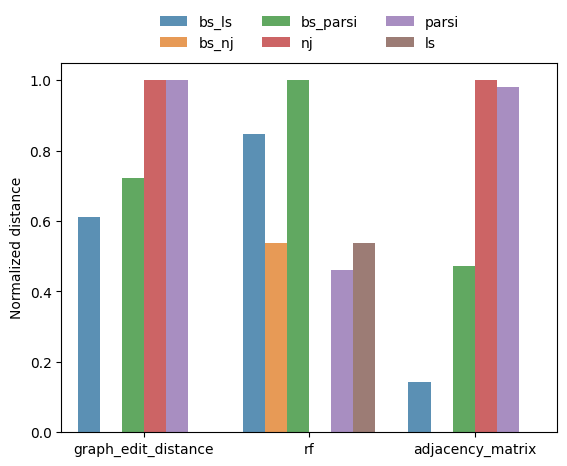

In [162]:
import seaborn as sns


ax=sns.barplot(data=melted[melted.tradition == "parzival"],x="variable", y="value", hue="index", errorbar=None,alpha=.8)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
ax.set(ylabel="Normalized distance", xlabel="")
plt.savefig("results/parzival/parzival.png")

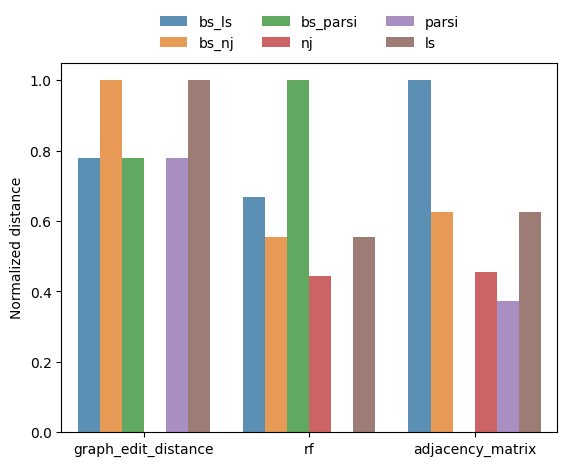

In [163]:
ax=sns.barplot(data=melted[melted.tradition == "notre_besoin"],x="variable", y="value", hue="index", errorbar=None, alpha=.8)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
ax.set(ylabel="Normalized distance", xlabel="")

plt.savefig("results/notre_besoin/notre_besoin.png")